# EIT-CEM Forward Problem

In [1]:
#Fix your enviroment
import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

from codes.module1_mesh import *
from codes.module2_forward import *
from codes.module3_inverse import *
from codes.module4_auxiliar import *
%matplotlib inline

In [2]:
"Electrodes and Mesh"
ele_pos=electrodes_position(L=16, per_cober=0.5, rotate=0)
mesh_refined=MyMesh(r=1, n=10*2, n_in=8*10, n_out=3*2, electrodes_obj=ele_pos)

#### Malhas

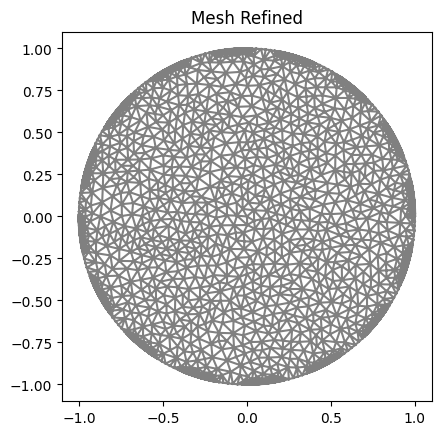

In [3]:
plot(mesh_refined, title="Mesh Refined");

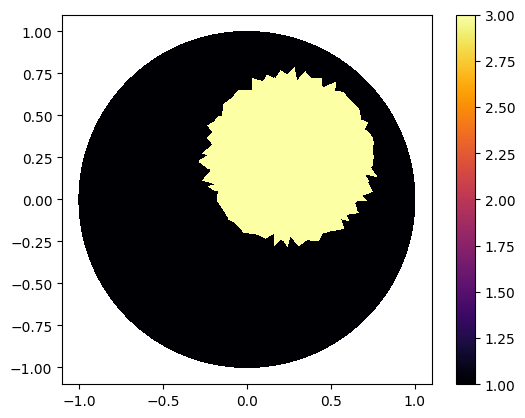

In [4]:
ValuesCells0=GammaCircle(mesh_refined,3.0,1.0,0.50, 0.25, 0.25);
Q = FunctionSpace(mesh_refined, "DG", 0) #Define Function space with basis Descontinuous Galerkin
gamma0 = Function(Q)
gamma0.vector()[:]=ValuesCells0          


"Plot"
plot_figure(gamma0, name="")

In [5]:
"Forward Problem"
L=16
VD=FiniteElement('CG',mesh_refined.ufl_cell(),1) #Lagrange pol. degree 1
l=int(L)                                        #Measurements number.
z=np.ones(L)*0.025E-5                           #Impedance
I_all=current_method(L,l, method=2, value=1)    #Current pattern

In [13]:
ForwardObject=ForwardProblem(mesh_refined, z)

VD=FiniteElement('CG',mesh_refined.ufl_cell(),1) #Solution Space Continous Galerkin
list_u0,list_U0 = ForwardObject.solve_forward(VD, I_all, gamma0)
list_U0 = (np.array(list_U0).flatten())

#### Boundary $u$

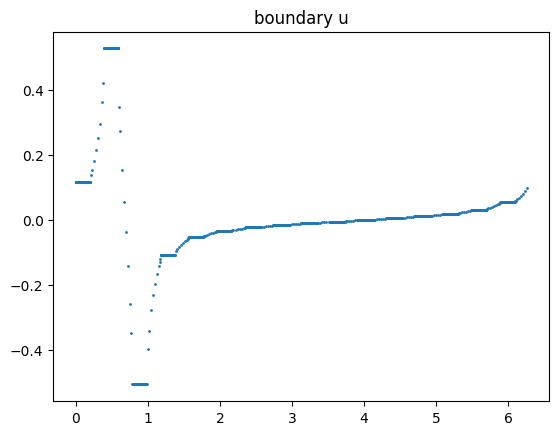

In [14]:
index=1
u_data=getBoundaryVertex(mesh_refined, list_u0[index]);
data_u0=plot_boundary(mesh_refined, data=u_data, name='boundary u', line=0);

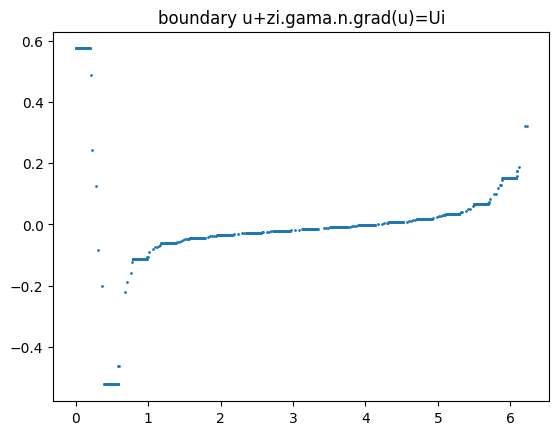

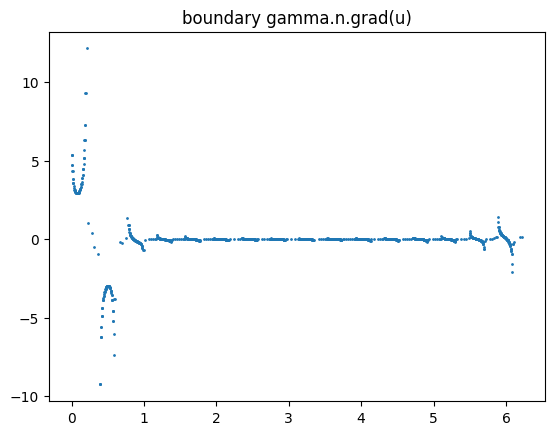

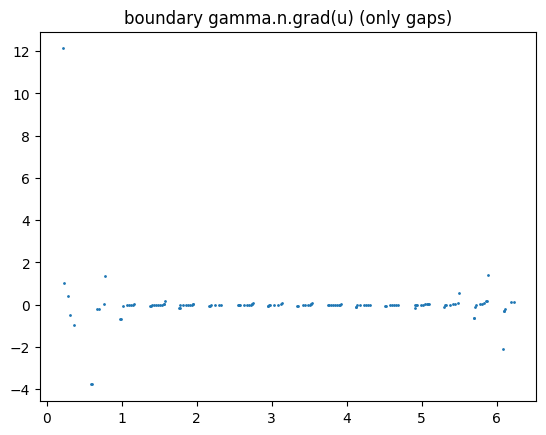

In [8]:
data = ForwardObject.verify_solution_graphs(gamma0, sol_index=0, method=1)
data = ForwardObject.verify_solution_graphs(gamma0, sol_index=0, method=2)
data = ForwardObject.verify_solution_graphs(gamma0, sol_index=0, method=3)

In [9]:
ForwardObject.verify_solution_values(I_all, gamma0, sol_index=0, method=1)

Current values
Calculated: 0.7748 Expected: 1.0
Calculated: -0.7969 Expected: -1.0
Calculated: -0.0058 Expected: 0.0
Calculated: -0.0002 Expected: 0.0
Calculated: -0.0001 Expected: 0.0
Calculated: 0.0002 Expected: 0.0
Calculated: -0.0002 Expected: 0.0
Calculated: -0.0 Expected: 0.0
Calculated: 0.0 Expected: 0.0
Calculated: 0.0002 Expected: 0.0
Calculated: 0.0001 Expected: 0.0
Calculated: -0.0001 Expected: 0.0
Calculated: -0.0001 Expected: 0.0
Calculated: 0.0009 Expected: 0.0
Calculated: 0.0012 Expected: 0.0
Calculated: 0.005 Expected: 0.0
Soma das correntes calculada:  -0.020940284603928036


In [10]:
ForwardObject.verify_solution_values(I_all, gamma0, sol_index=0, method=2)

Potential values
Calculated: 0.57485 Expected: 0.57485
Calculated: -0.52322 Expected: -0.52322
Calculated: -0.11187 Expected: -0.11187
Calculated: -0.06172 Expected: -0.06172
Calculated: -0.04465 Expected: -0.04465
Calculated: -0.03452 Expected: -0.03452
Calculated: -0.02709 Expected: -0.02709
Calculated: -0.02074 Expected: -0.02074
Calculated: -0.01481 Expected: -0.01481
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calculated: -0.00874 Expected: -0.00874
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calculated: -0.00201 Expected: -0.00201
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calculated: 0.00618 Expected: 0.00618
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calculated: 0.01721 Expected: 0.01721
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calculated: 0.03445 Expected: 0.03445
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calculated: 0.06662 Expected: 0.066

### Plot u

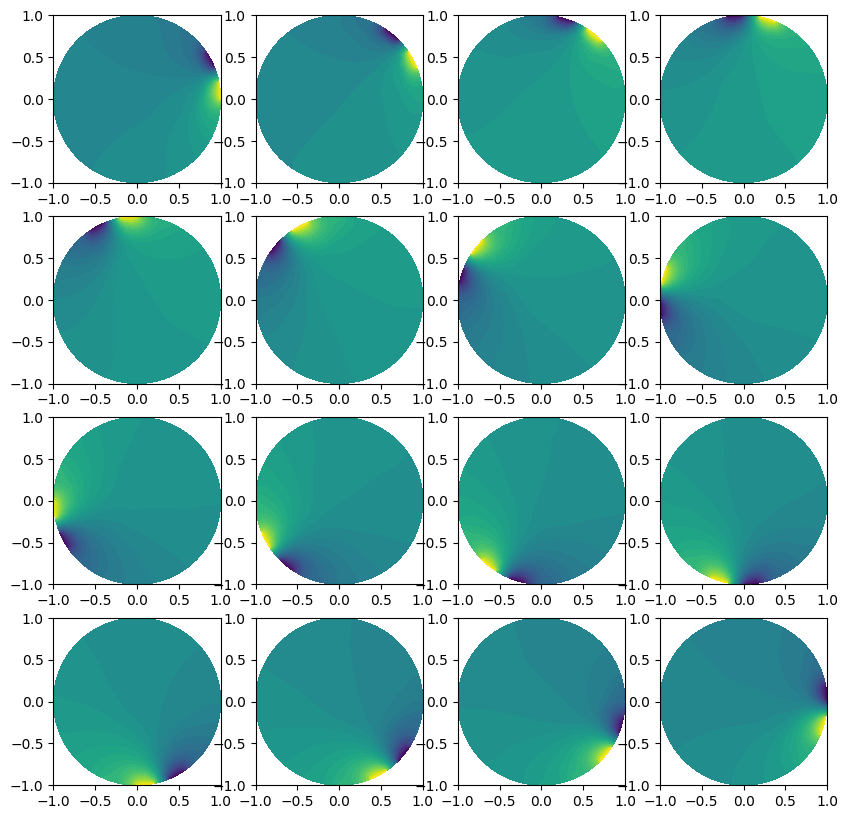

In [15]:
plt.figure(figsize=(10, 10))
for i in range(0, l):
    plt.subplot(4,4,i+1)
    plot(list_u0[i])

### Solver

### Plot Noise

In [16]:
"Getting noised solution"
noise_level=0.05
noise_type='uniform'
if noise_level>1E-10: list_U0_noised = ForwardObject.add_noise(noise_level, noise_type, seed=1)

print(list_U0_noised[0:L])

[ 0.58842294 -0.52832843 -0.11627934 -0.07068404 -0.0374214  -0.05375524
 -0.01251089 -0.02710291 -0.01214826 -0.01081958  0.01020443 -0.01103743
  0.0145178   0.03123819  0.07609615  0.14087399]


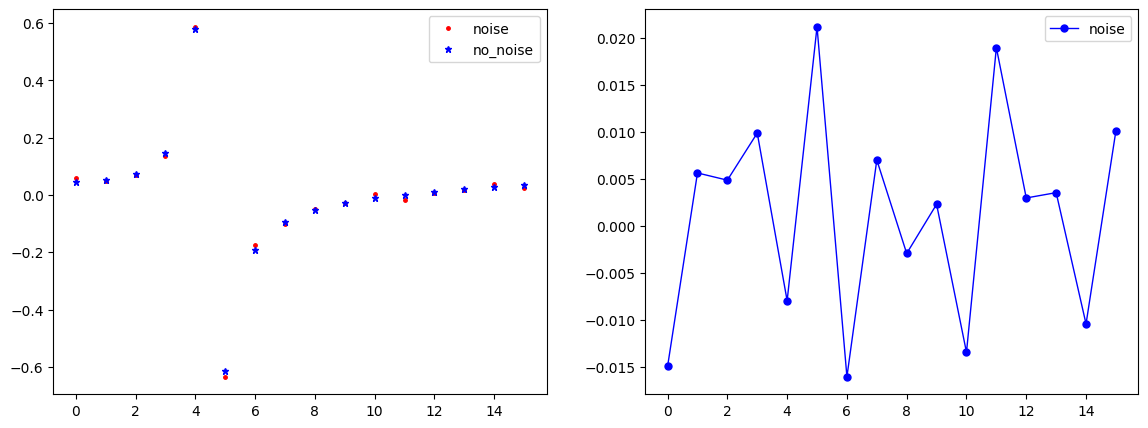

In [17]:
"Plot electrodes noise."
index=4 #Index in array
if noise_level>1E-5:
    vec_U0_noise=list_U0_noised[index*L:(index+1)*L]
    vec_U0=list_U0[index*L:(index+1)*L]
    x=range(len(vec_U0_noise))

    plt.figure(figsize=(14, 5),)
    plt.subplot(1,2,1)
    plt.plot(x, vec_U0_noise, linewidth=0,  marker='.', markersize=5, label="noise", color='red');
    plt.plot(x, vec_U0, linewidth=0,  marker='*', markersize=5, label="no_noise", color="blue");
    plt.legend()
   
    plt.subplot(1,2,2)
    plt.plot(x, vec_U0-vec_U0_noise, linewidth=1,  marker='.', markersize=10, label="noise", color="blue");
    plt.legend()
    
    plt.show()